In [1]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

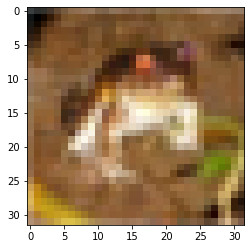

In [3]:
plt.imshow(X_train[0])

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

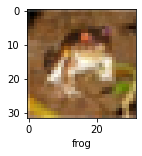

In [9]:
plot_sample(X_train,y_train,0)

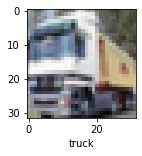

In [10]:
plot_sample(X_train,y_train,1)

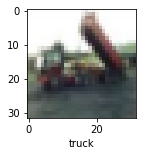

In [11]:
plot_sample(X_train,y_train,2)

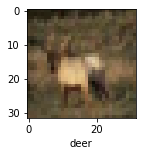

In [12]:
plot_sample(X_train,y_train,3)

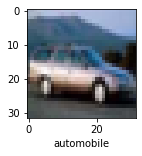

In [13]:
plot_sample(X_train,y_train,4)

In [14]:
X_train=X_train/255
X_test=X_test/255


In [15]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [17]:
#ANN

In [17]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(
optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 180s 113ms/step - loss: 1.8129 - accuracy: 0.3509
Epoch 2/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.6222 - accuracy: 0.4294
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.5400 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 176s 112ms/step - loss: 1.4798 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4284 - accuracy: 0.4985


In [18]:
from sklearn.metrics import classification_report
import numpy as np

y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))


              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1000
           1       0.70      0.45      0.54      1000
           2       0.35      0.44      0.39      1000
           3       0.40      0.29      0.34      1000
           4       0.41      0.42      0.41      1000
           5       0.47      0.30      0.36      1000
           6       0.47      0.63      0.54      1000
           7       0.51      0.61      0.56      1000
           8       0.56      0.67      0.61      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



# CNN

In [20]:
cnn=models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(
optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.5326 - accuracy: 0.4450
Epoch 2/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1773 - accuracy: 0.5837
Epoch 3/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.0461 - accuracy: 0.6331
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9665 - accuracy: 0.6621
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9158 - accuracy: 0.6817
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8673 - accuracy: 0.6958
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8274 - accuracy: 0.7119
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7935 - accuracy: 0.7228
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7631 - accuracy: 0.7338
Epoch 10/10
1563/1563 [==============================] - 52s 33

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9616 - accuracy: 0.6697


[0.9616284966468811, 0.669700026512146]

In [22]:
y_test=y_test.reshape(-1,)

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

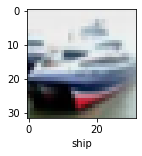

In [24]:
plot_sample(X_test,y_test,1)

In [25]:
y_pred=cnn.predict(X_test)

In [27]:
y_pred[:5]

array([[3.19724809e-03, 1.06242695e-03, 7.04273582e-02, 6.84682250e-01,
        2.62450357e-03, 9.94979590e-02, 6.01529144e-03, 2.86010501e-04,
        1.20676644e-01, 1.15303146e-02],
       [1.73585400e-01, 2.02267058e-02, 1.12162714e-04, 4.82347386e-05,
        1.67014150e-05, 1.95384223e-06, 1.17359399e-07, 1.58712237e-06,
        7.84887373e-01, 2.11197585e-02],
       [8.10566917e-02, 4.19195443e-02, 2.40187324e-03, 7.22936681e-03,
        2.59420340e-04, 7.13180518e-04, 5.02512812e-05, 5.28995995e-04,
        8.20621192e-01, 4.52195145e-02],
       [7.15987980e-01, 4.60421629e-02, 6.32043974e-03, 5.04755648e-04,
        2.77980301e-03, 2.32573402e-05, 7.90943814e-05, 2.17976471e-04,
        2.25516915e-01, 2.52758758e-03],
       [1.28153749e-06, 1.29716645e-05, 2.48251669e-02, 5.35783591e-03,
        5.67225367e-02, 5.80812084e-05, 9.13012385e-01, 1.96059250e-06,
        6.48983860e-06, 1.24429971e-06]], dtype=float32)

In [28]:
y_classes=[np.argmax(element) for element in y_pred]

In [30]:
y_classes[:5]

[3, 8, 8, 0, 6]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

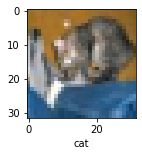

In [32]:
plot_sample(X_test,y_test,0)

In [33]:
classes[y_classes[0]]

'cat'